In [49]:
from datetime import datetime

from metpy.plots import declarative
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [68]:
# Set Model Run Date/Time
date = datetime(1989, 2, 2, 15)

# Remote Access to NCEI
ds = xr.open_dataset(f'https://www.ncei.noaa.gov/thredds/dodsC/cdr/gridsat/{date:%Y}'
                     f'/GRIDSAT-B1.{date:%Y.%m.%d.%H}.v02r01.nc').metpy.parse_cf()


In [69]:
display(ds)

<xarray.Dataset>
Dimensions:        (time: 1, Ngeo: 3, sparse3ir: 1, lat: 2000, lon: 5143,
                    sparse2ir: 491134, sparse2wv: 1, sparse2vs: 1)
Coordinates:
  * time           (time) datetime64[ns] 1989-02-02T15:00:00
  * sparse3ir      (sparse3ir) int32 0
  * lat            (lat) float32 -70.0 -69.93 -69.86 ... 69.79 69.86 69.93
  * lon            (lon) float32 -180.0 -179.9 -179.9 ... 179.8 179.9 179.9
    metpy_crs      object Projection: latitude_longitude
  * sparse2ir      (sparse2ir) int32 228270 228271 259135 ... 9999942 9999947
  * sparse2wv      (sparse2wv) int32 0
  * sparse2vs      (sparse2vs) int32 0
Dimensions without coordinates: Ngeo
Data variables: (12/25)
    satlat         (time, Ngeo) float32 ...
    satlon         (time, Ngeo) float32 ...
    satrad         (time, Ngeo) float32 ...
    satname        (time, Ngeo) |S64 ...
    b1ufile        (time, Ngeo) |S64 ...
    b1file         (time, Ngeo) |S64 ...
    ...             ...
    vschn          (time, lat, lon) float32 ...
    vschn_2        (time, sparse2vs) float32 ...
    satid_ir       (time, lat, lon) float32 ...
    satid_wv       (time, lat, lon) int8 ...
    satid_vs       (time, lat, lon) int8 ...
    irwin_vza_adj  (time, lat, lon) float32 ...
Attributes: (12/53)
    title:                           GridSat-B1 - Gridded Satellite (GridSat)...
    summary:                         Geostationary data are remapped to equal...
    Conventions:                     CF-1.6
    Metadata_Conventions:            CF-1.6, Unidata Dataset Discovery v1.0, ...
    references:                      http://dx.doi.org/10.1175/2011BAMS3039.1...
    source:                          ISCCP.B1U.a.GMS-3.1989.02.02.1532.JMA.gz...
    ...                              ...
    IRWIN_calibration_file:          b1u.calibration.correction.IRWIN.v17
    IRWVP_calibration_version:       v01
    Corrections:                     IRWIN has VZA correction, All channels h...
    DODS.strlen:                     50
    DODS.dimName:                    StrLen
    DODS_EXTRA.Unlimited_Dimension:  time

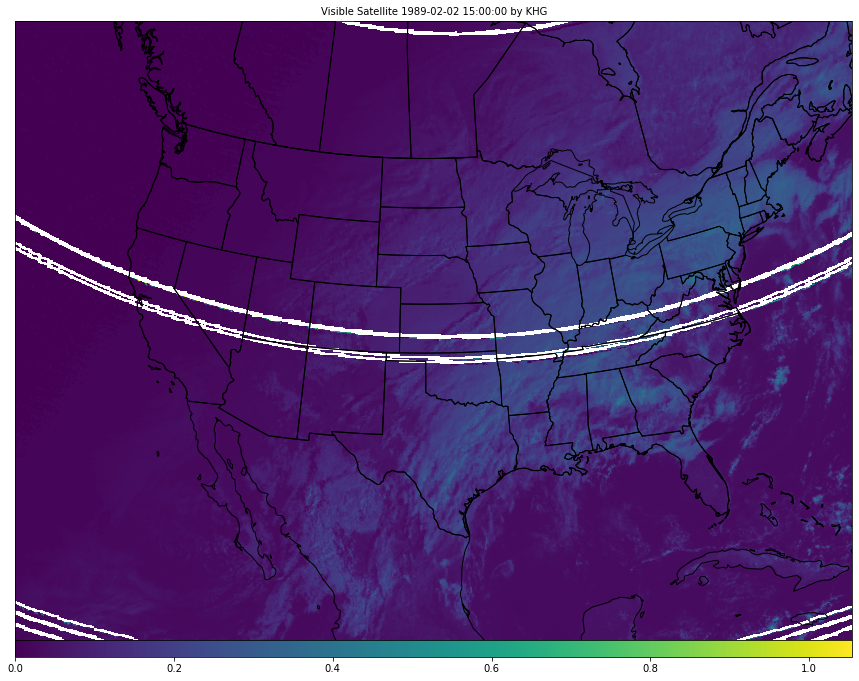

In [70]:
# Set the parameters for the image you want to plot
img = declarative.ImagePlot()
img.data = ds
img.field = 'vschn'
img.time = date
img.colorbar = 'horizontal'

# Set the attributes for the map
# and put the data on the map
panel = declarative.MapPanel()
panel.area = [-125, -74, 20, 55]
panel.projection = 'lcc'
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'Visible Satellite {date} by KHG'
panel.plots = [img]

# Set the attributes for the panel
# and put the panel in the figure
pc = declarative.PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]

# Show the figure
#pc.save(f'GOES_IR_{img.time:%Y%m%d_%H}.png', dpi=150, bbox_inches='tight')
pc.show()



<xarray.DataArray 'vschn' (lat: 2000, lon: 5143)>
[10286000 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 1989-02-02T15:00:00
  * lat        (lat) float32 -70.0 -69.93 -69.86 -69.79 ... 69.79 69.86 69.93
  * lon        (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:             Visible reflectance near 0.6 microns (Nadir-most o...
    standard_name:         toa_bidirectional_reflectance
    units:                 1
    comment:               Nadir-most observations
    valid_range:           [-0.2  5. ]
    Radiance_comment:      Radiance is calculated via: Rad = VSCHN * vis_rad_...
    DigitalCount_comment:  Original digital counts are calculated via: DC = V...
    _ChunkSizes:           [   1 2000 5143]

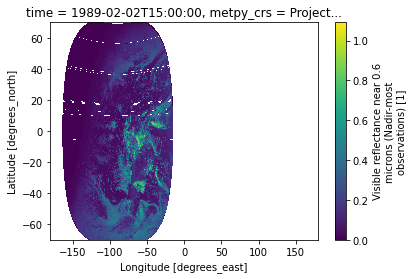

In [71]:
satid_vs_data = ds["vschn"][0,:,:]
display(satid_vs_data)
satid_vs_data.plot()

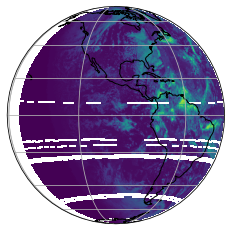

In [72]:
fig = plt.figure()

ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-100, central_latitude=0.0))
ax.coastlines(resolution='110m')
ax.gridlines()
ax.imshow(img=satid_vs_data,transform = ccrs.PlateCarree())

In [73]:
display(satid_vs_data)

<xarray.DataArray 'vschn' (lat: 2000, lon: 5143)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time       datetime64[ns] 1989-02-02T15:00:00
  * lat        (lat) float32 -70.0 -69.93 -69.86 -69.79 ... 69.79 69.86 69.93
  * lon        (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:             Visible reflectance near 0.6 microns (Nadir-most o...
    standard_name:         toa_bidirectional_reflectance
    units:                 1
    comment:               Nadir-most observations
    valid_range:           [-0.2  5. ]
    Radiance_comment:      Radiance is calculated via: Rad = VSCHN * vis_rad_...
    DigitalCount_comment:  Original digital counts are calculated via: DC = V...
    _ChunkSizes:           [   1 2000 5143]